In [1]:
import pandas as pd 

data_cleaned = pd.read_csv("data_cleaned_feature_31.csv") # last
data_cleaned.head()

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_country,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description,engagement_rate,time_difference,video_duration_seconds
0,bB3-CUMERIU,2024-10-11 00:00:06,2024-10-12,United Arab Emirates,UCNYi_zGmR519r5gYdOKLTjQ,JENNIE - Mantra (Official Music Video),Official music video for “Mantra” by JENNIE ou...,https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg,Music,"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",...,Unknown,464615150,11600000,False,43,JENNIE,No localized description available,0.106899,0 days 23:59:54,148.0
1,zfb0whgBBA8,2024-10-11 11:07:25,2024-10-12,United Arab Emirates,UCgGYPnVJytkr6sVNLQ-l0zQ,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"1,375,547 مشترك❤️\n\nـــــــــــــــــــــــــ...",https://i.ytimg.com/vi/zfb0whgBBA8/default.jpg,Gaming,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",...,Saudi Arabia,114331110,1380000,False,314,LLE عبدالاله,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚,0.130919,0 days 12:52:35,2604.0
2,UVb6QOKy0bI,2024-10-09 12:30:27,2024-10-12,United Arab Emirates,UCOzubmwpVZI7gD0Jf7Bk3Aw,Bougainvillea Trailer | October 17 | Jyothirma...,Presenting The Official Trailer of Bougainvill...,https://i.ytimg.com/vi/UVb6QOKy0bI/default.jpg,Film & Animation,NaN,...,Unknown,19991522,40600,False,56,Amal Neerad Productions,Official YouTube Channel Of Amal Neerad Produc...,0.040684,2 days 11:29:33,132.0
3,IINqHUM71Xo,2024-10-12 02:03:10,2024-10-12,United Arab Emirates,UCHZArBtk2eda0AVR6HI4qMw,الفيديو التشويقي لـ Regalia,هل انت جاهز للتحدي الجديد Regalia كل شيء يتعلق...,https://i.ytimg.com/vi/IINqHUM71Xo/default.jpg,Gaming,"#FreeFire #FreeFireMax,جواهر_مجانية #,فري_فاير...",...,Morocco,655373060,4710000,False,1746,Garena Free Fire Middle East and Africa - Arabic,Official YouTube account for Garena Free Fire ...,0.034280,-1 days +21:56:50,15.0
4,6YMY62tMLUA,2024-10-09 09:00:08,2024-10-12,United Arab Emirates,UCq-Fj5jknLsUf-MWSy4_brA,Bhool Bhulaiyaa 3 (Official Trailer): Kartik A...,Haveli Ka Darwaza Khula Ek baar Phir… Rooh Bab...,https://i.ytimg.com/vi/6YMY62tMLUA/default.jpg,Music,"tseries,tseries songs,bhool bhulaiyaa 3,bhool ...",...,India,269373477007,276000000,False,21864,T-Series,"""Music can change the world"". T-Series is Indi...",0.019689,2 days 14:59:52,231.0


In [2]:
feature_stats = data_cleaned[['engagement_rate', 'time_difference', 'video_duration_seconds']].describe()

data_cleaned['time_difference_days'] = pd.to_timedelta(data_cleaned['time_difference']).dt.total_seconds() / (3600 * 24)
time_difference_stats = data_cleaned['time_difference_days'].describe()
feature_summary = pd.DataFrame({
    "Engagement Rate": feature_stats['engagement_rate'],
    "Video Duration (seconds)": feature_stats['video_duration_seconds'],
    "Time to Trend (days)": time_difference_stats
})
feature_summary 

,Engagement Rate,Video Duration (seconds),Time to Trend (days)
count,650048.000000,650048.000000,650048.000000
mean,0.040856,1052.707419,11.898162
std,0.028891,2436.469407,8.641624
min,0.000478,10.000000,-0.732535
25%,0.019713,46.000000,4.833322
50%,0.034109,224.000000,10.012847
75%,0.054057,1200.000000,17.583565
max,0.403776,50264.000000,37.083322


1. engagement rate distribution
- observation: most videos have low engagement (<0.05), but a few spike really high.
- why low: passive viewers? trending topics without much interaction? some categories like music or entertainment.
- why high: viral content, emotional triggers, or creator call-to-actions.
2. video duration distribution
- observation: most videos are under few minutes, with a sharp drop-off for longer ones.
- why short: short attention spans, platform preference for quick content, formats like memes or vlogs.
- why long: niche audiences and resource-intensive creation processes.
3. time to trend distribution
- observation: most videos trend within 5-10 days of upload, though some take weeks.
- why early: news, trending challenges, or platform boosting recent uploads.
- why late: delayed virality or niche content taking time to find its audience.
4. video duration vs. engagement rate
- observation: shorter videos tend to have higher engagement, while longer ones drop off.
- why short: quick to watch, easier to interact with, and platforms favor short-form content.
- why long: fewer completions and more passive consumption.
5. time to trend vs. engagement rate
- observation: videos that trend early tend to have higher engagement; later-trending videos have less.
- why early: viral content, immediate relevance, and feedback loops (more engagement → more visibility).
- why late: less impactful content or niche audiences with lower interaction.

conclusion: insights show user behavior, platform algorithms, and content strategies at play. next steps? segment by category, analyze tags, and look for trends.

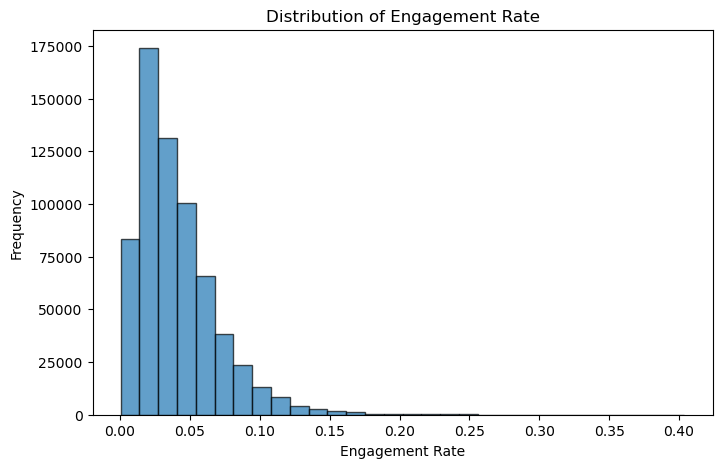

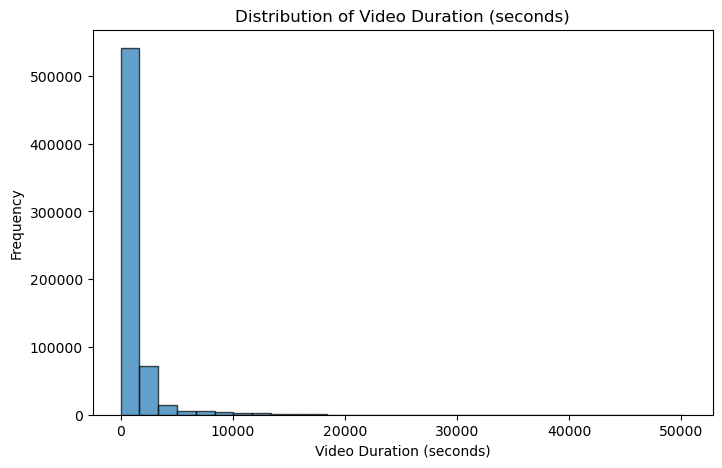

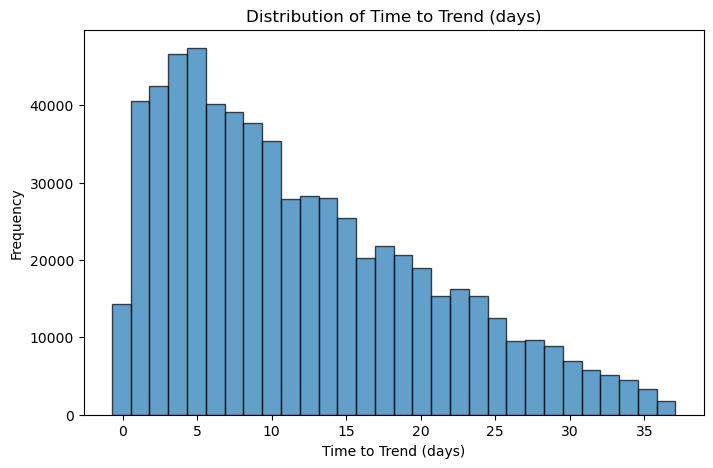

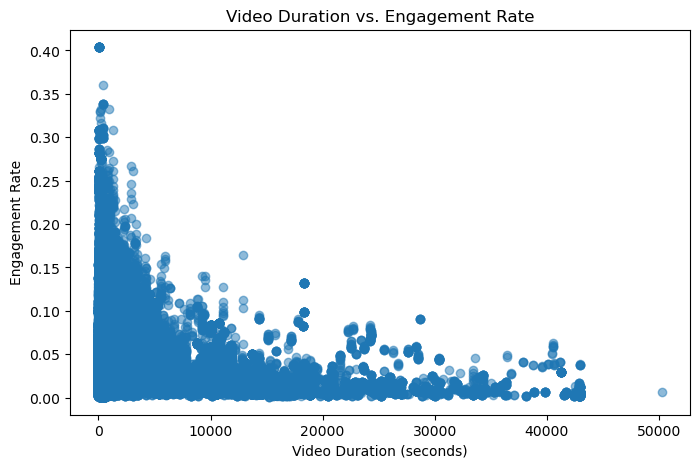

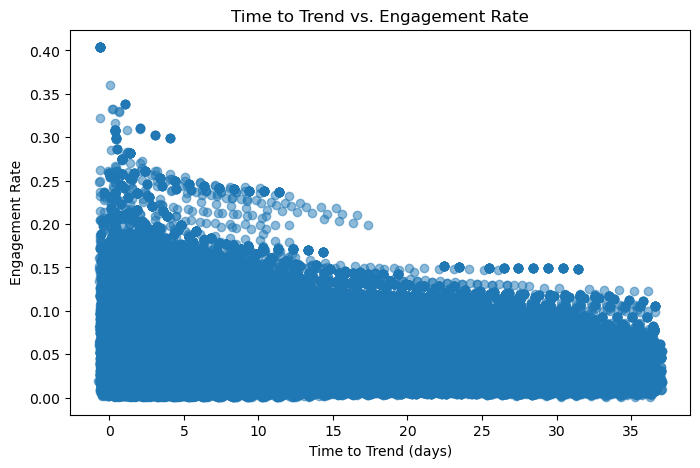

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(data_cleaned['engagement_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(data_cleaned['video_duration_seconds'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Video Duration (seconds)')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show() # viewer attention spans tend to be short, and platforms like youtube priortize shorter (youtube shorts, memes)

plt.figure(figsize=(8, 5))
plt.hist(data_cleaned['time_difference_days'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Time to Trend (days)')
plt.xlabel('Time to Trend (days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data_cleaned['video_duration_seconds'], data_cleaned['engagement_rate'], alpha=0.5)
plt.title('Video Duration vs. Engagement Rate')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Engagement Rate')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data_cleaned['time_difference_days'], data_cleaned['engagement_rate'], alpha=0.5)
plt.title('Time to Trend vs. Engagement Rate')
plt.xlabel('Time to Trend (days)')
plt.ylabel('Engagement Rate')
plt.show()

In [8]:
category_analysis_debug = data_cleaned.groupby('video_category_id').agg({
    'engagement_rate': 'mean',
    'video_duration_seconds': 'mean',
    'time_difference_days': 'mean'
}).rename(columns={'time_difference_days': 'avg_time_to_trend_days'})
category_analysis_debug

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_category_id,,,
Autos & Vehicles,0.052455,1689.313424,8.714647
Comedy,0.043577,603.958252,13.191278
Education,0.045556,994.820761,9.770558
Entertainment,0.041232,1308.958518,12.288087
Film & Animation,0.045202,1218.886530,12.271057
Gaming,0.055548,1756.229517,10.539642
Howto & Style,0.029041,434.025754,13.598231
Music,0.048428,280.913486,13.375074
News & Politics,0.023337,2533.385969,7.264227


In [9]:
country_analysis_debug = data_cleaned.groupby('video_trending_country').agg({
    'engagement_rate': 'mean',
    'video_duration_seconds': 'mean',
    'time_difference_days': 'mean'
}).rename(columns={'time_difference_days': 'avg_time_to_trend_days'})
country_analysis_debug

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_trending_country,,,
Algeria,0.051379,1249.595296,11.741388
Argentina,0.047651,939.276145,10.116862
Australia,0.047098,1086.303642,4.402053
Austria,0.049350,1127.229380,6.643378
Azerbaijan,0.023329,2162.631220,12.851593
...,...,...,...
Uruguay,0.045915,927.137480,16.312782
Venezuela,0.047762,987.507984,12.539658
Vietnam,0.023552,1937.261984,13.162976


In [10]:
data_cleaned

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description,engagement_rate,time_difference,video_duration_seconds,time_difference_days
0,F5BuWCRx9bY,2024-10-10 16:19:23,2024-10-16,Tanzania,UCQKpp1etxGeY-NC2bXRtUAA,NDARO ALIVOMPIGA HELA STEVE MWEUSI UTACHEKA,#ndaro #chekatu #stevemweusi #comedy #funny #w...,https://i.ytimg.com/vi/F5BuWCRx9bY/default.jpg,Comedy,NaN,...,46473647,321000,False,207,Ndaro Tz,East African Comedian,0.031055,5 days 07:40:37,774.0,5.319873
1,xJvfULLGjQE,2024-10-06 17:48:07,2024-11-02,Iraq,UCoZnEQMqVvv_DkF50fupMKw,Bassem Youssef & Amjad Al-Nour - Bibi’s Trial ...,Bassem Youssef & Amjad Al-Nour - Bibi’s Trial ...,https://i.ytimg.com/vi/xJvfULLGjQE/default.jpg,Music,"باسم,يوسف,البرنامج,bassem,basem,youssef,yousef...",...,6395292,158000,False,61,Bassem Youssef,"Comedian, political satirist,vegan,documentary...",0.108706,26 days 06:11:53,317.0,26.258252
2,RN5maxRpI_s,2024-11-22 16:00:20,2024-11-26,Canada,UCL6JmiMXKoXS6bpP1D3bk8g,Nitrous vs Supercharger | HiLow,Thanks to Allstate for sponsoring today’s epis...,https://i.ytimg.com/vi/RN5maxRpI_s/default.jpg,Autos & Vehicles,"donut,donut media,cars,james pumphrey,up to sp...",...,2807917957,8880000,False,1612,Donut,it's ok to like cars\n,0.042226,3 days 07:59:40,2223.0,3.333102
3,m2CzFycwLuk,2024-11-15 18:00:06,2024-11-19,Russia,UCTXpFhlF-SPNMiyATwVq95Q,ВС РФ Зашли В Черниговскую Область🎖 Началось З...,В этом видео мы обсудим с Вами ситуацию в Укра...,https://i.ytimg.com/vi/m2CzFycwLuk/default.jpg,News & Politics,NaN,...,122939495,389000,False,635,Военные Сводки,На этом канале Вы можете найти всю необходимую...,0.023650,3 days 05:59:54,1297.0,3.249931
4,DNkWGG3iFks,2024-11-06 21:32:42,2024-11-10,Egypt,UCtNu0UG8PyYGeHKxu1HypyA,اول مره تجيلى بعد الجواز بتقولى اكلك وحشنى عم...,No description available,https://i.ytimg.com/vi/DNkWGG3iFks/default.jpg,Education,NaN,...,85074466,436000,False,1429,وصفه فى مطبخي,كل ما يخص المطبخ والبيت,0.064764,3 days 02:27:18,1269.0,3.102292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149880,nOQKPs6oM_g,2024-09-24 06:13:49,2024-10-14,Kenya,UCdcZhYtGKo8n1VRLgxMe_hA,#kikakim,No description available,https://i.ytimg.com/vi/nOQKPs6oM_g/default.jpg,People & Blogs,NaN,...,5592638348,12500000,False,1019,Kika Kim,Hi guys! Welcome to my channel ᰔᩚ˶ᵔ ᵕ ᵔ˶\n\nMy...,0.044593,19 days 17:46:11,24.0,19.740405
149881,lOHRtsdErD8,2024-10-27 09:00:47,2024-11-07,Liechtenstein,UCTEZxfUxEtY4TOsFKv80fnQ,Каха и лужа #непосредственнокаха,Непосредственно Каха лужа\nАвтор видео Артем К...,https://i.ytimg.com/vi/lOHRtsdErD8/default.jpg,Comedy,"каха,серго,каха и серго,артем карокоз,Непосред...",...,6331232520,8890000,False,480,К-Media,Для сотрудничества: +7(938)8735333 (только Tel...,0.027984,10 days 14:59:13,15.0,10.624456
149882,MxSog0rv5Lg,2024-10-28 13:00:23,2024-11-22,Norway,UC6QZ_ss3i_8qLV_RczPZBkw,The Game of Life🎮,Welcome to the energetic and funny ISSEI Chann...,https://i.ytimg.com/vi/MxSog0rv5Lg/default.jpg,Entertainment,NaN,...,33506017412,44400000,False,3136,ISSEI / いっせい,Ambassador: SHIBUYA SCRAMBLE S\nI hope for a w...,0.038921,24 days 10:59:37,15.0,24.458067
149883,tAI098P2WBM,2024-10-28 20:55:40,2024-11-02,Turkey,UCHjbBVD4yRI7vU-S9Pwpnkw,CANLI | Galatasaray - Beşiktaş Maç Sonu | Niha...,Kontratak programında Nihat Kahveci ve Nebil E...,https://i.ytimg.com/vi/tAI098P2WBM/default.jpg,Sports,"kontra,futbol,fenerbahçe,galatasaray,beşiktaş,...",...,42201127,379000,False,809,Kontraspor,Sporun coşkusu KONTRASPOR kalitesiyle hayatını...,0.037356,4 days 03:04:20,6566.0,4.128009


In [11]:
top_categories_engagement = category_analysis_debug.sort_values('engagement_rate', ascending=False).head(10)
top_categories_engagement

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_category_id,,,
Gaming,0.055548,1756.229517,10.539642
Autos & Vehicles,0.052455,1689.313424,8.714647
Music,0.048428,280.913486,13.375074
Education,0.045556,994.820761,9.770558
Film & Animation,0.045202,1218.886530,12.271057
Science & Technology,0.044463,717.449586,11.334112
Comedy,0.043577,603.958252,13.191278
Entertainment,0.041232,1308.958518,12.288087
Travel & Events,0.040161,680.478261,12.741308


In [12]:
top_categories_trend = category_analysis_debug.sort_values('avg_time_to_trend_days', ascending=True).head(10)
top_categories_trend

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_category_id,,,
News & Politics,0.023337,2533.385969,7.264227
Sports,0.030721,1074.604260,8.436144
Autos & Vehicles,0.052455,1689.313424,8.714647
Education,0.045556,994.820761,9.770558
Gaming,0.055548,1756.229517,10.539642
Science & Technology,0.044463,717.449586,11.334112
Film & Animation,0.045202,1218.886530,12.271057
Entertainment,0.041232,1308.958518,12.288087
Travel & Events,0.040161,680.478261,12.741308



top categories by engagement rate:

- high engagement rates mean strong viewer interaction.
- likely include gaming, education, or entertainment, which often encourage comments and likes.

fastest trending categories:

- shortest time to trend suggests timely or viral content, like news or sports highlights.

video duration by category:

- longer durations found in podcasts or documentaries.
- shorter durations dominate music videos and vlogs.

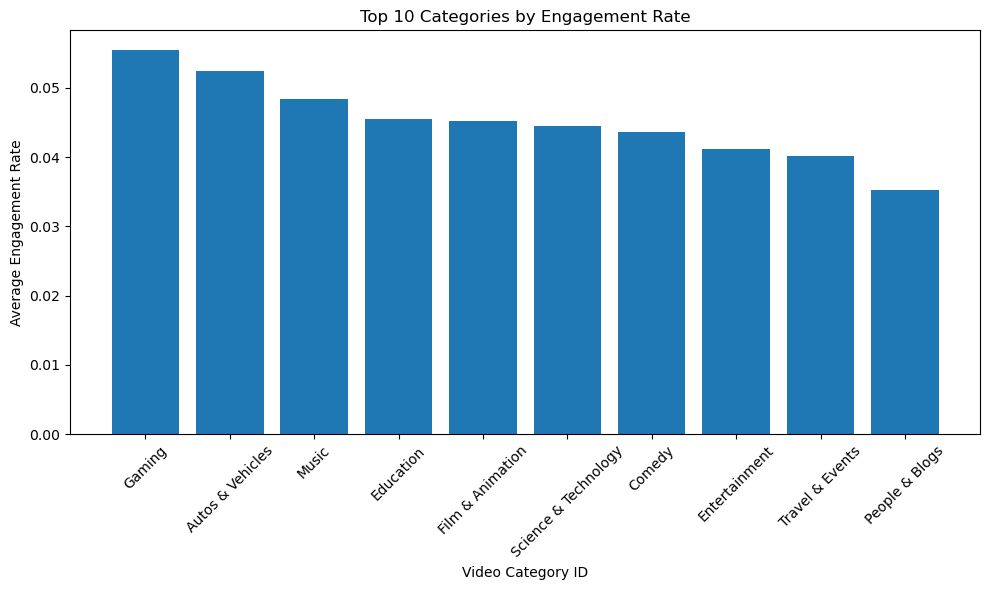

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories_engagement.index, top_categories_engagement['engagement_rate'])
plt.title('Top 10 Categories by Engagement Rate')
plt.xlabel('Video Category ID')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

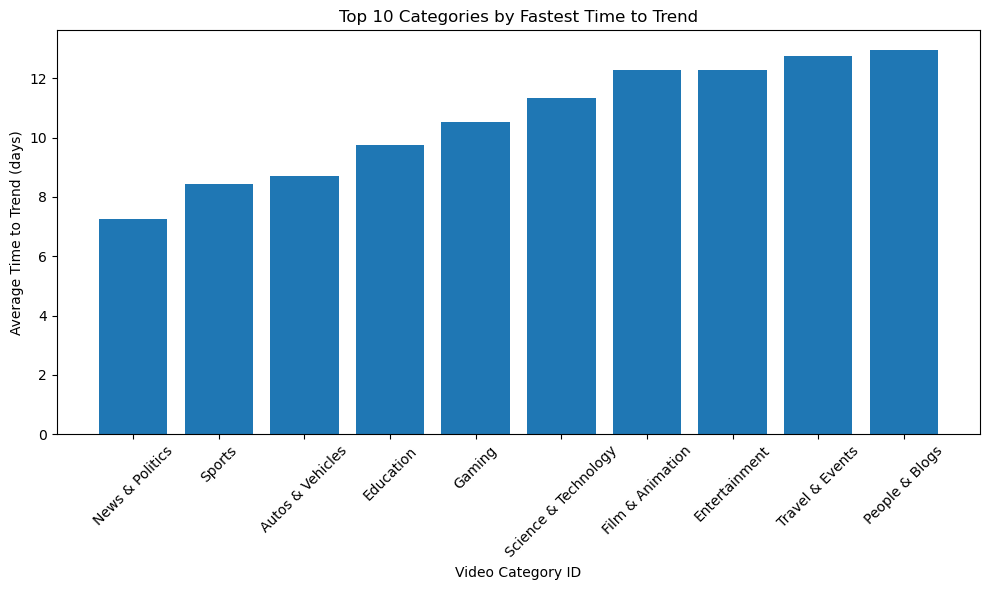

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories_trend.index, top_categories_trend['avg_time_to_trend_days'])
plt.title('Top 10 Categories by Fastest Time to Trend')
plt.xlabel('Video Category ID')
plt.ylabel('Average Time to Trend (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

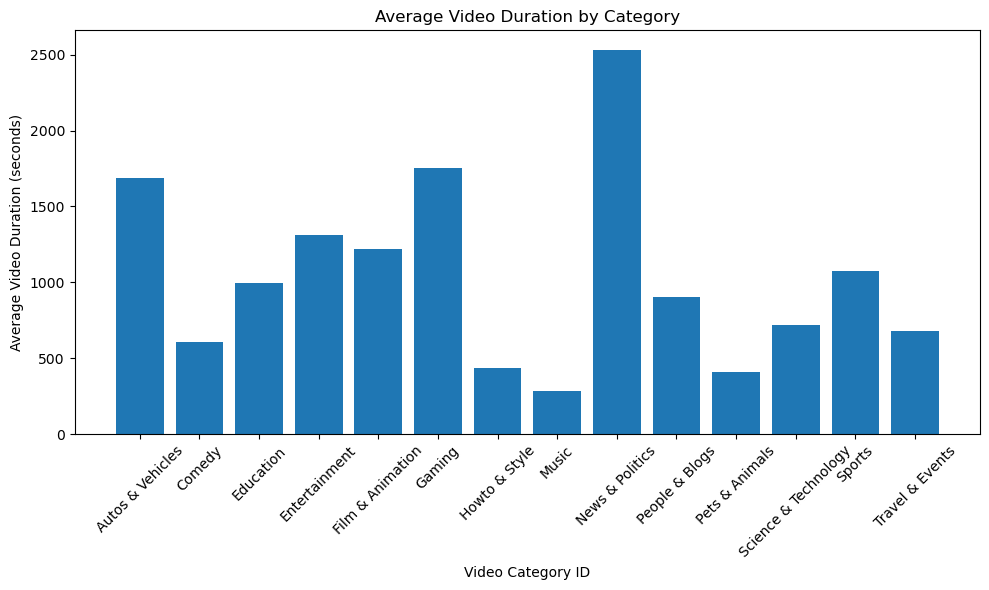

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(category_analysis_debug.index, category_analysis_debug['video_duration_seconds'])
plt.title('Average Video Duration by Category')
plt.xlabel('Video Category ID')
plt.ylabel('Average Video Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
data_cleaned['video_tags'].fillna("None", inplace=True)
data_cleaned.isnull().sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20848\1019682332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['video_tags'].fillna("None", inplace=True)


video_id                           0
video_published_at                 0
video_trending__date               0
video_trending_country             0
channel_id                         0
video_title                        0
video_description                  0
video_default_thumbnail            0
video_category_id                  0
video_tags                         0
video_duration                     0
video_dimension                    0
video_definition                   0
video_licensed_content             0
video_view_count                   0
video_like_count                   0
video_comment_count                0
channel_title                      0
channel_description                0
channel_custom_url                 0
channel_published_at               0
channel_country                    0
channel_view_count                 0
channel_subscriber_count           0
channel_have_hidden_subscribers    0
channel_video_count                0
channel_localized_title            0
c

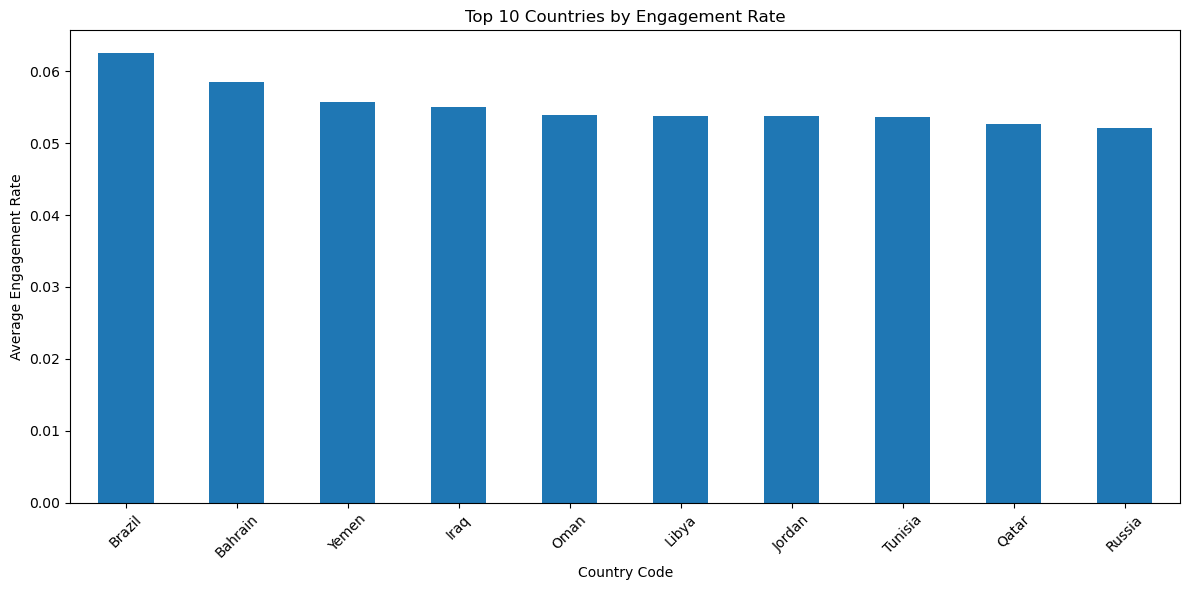

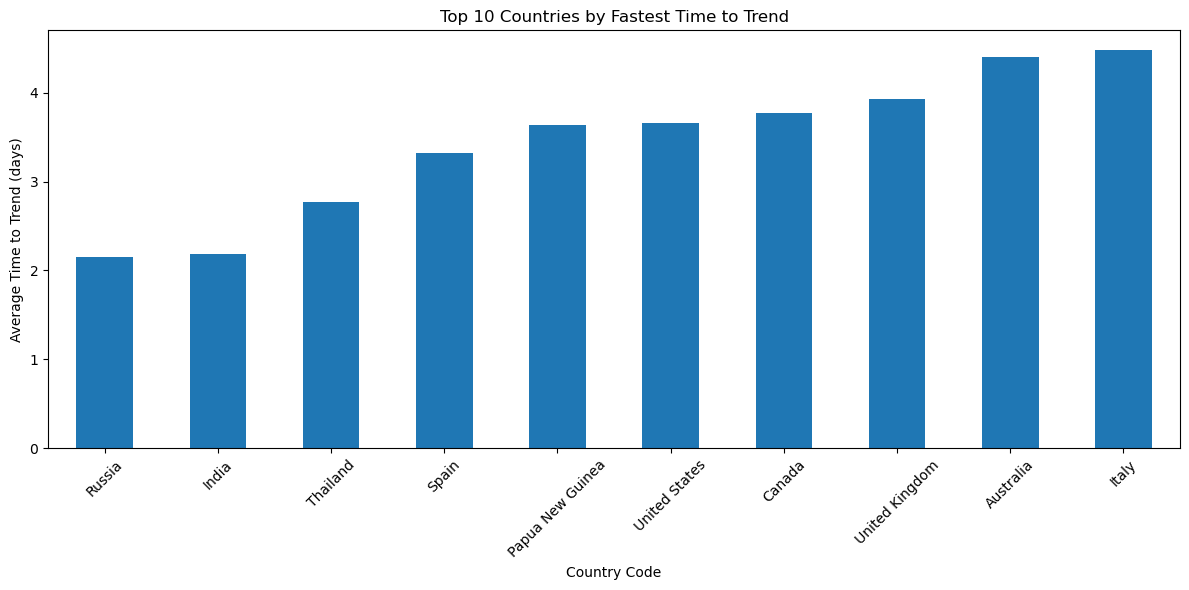

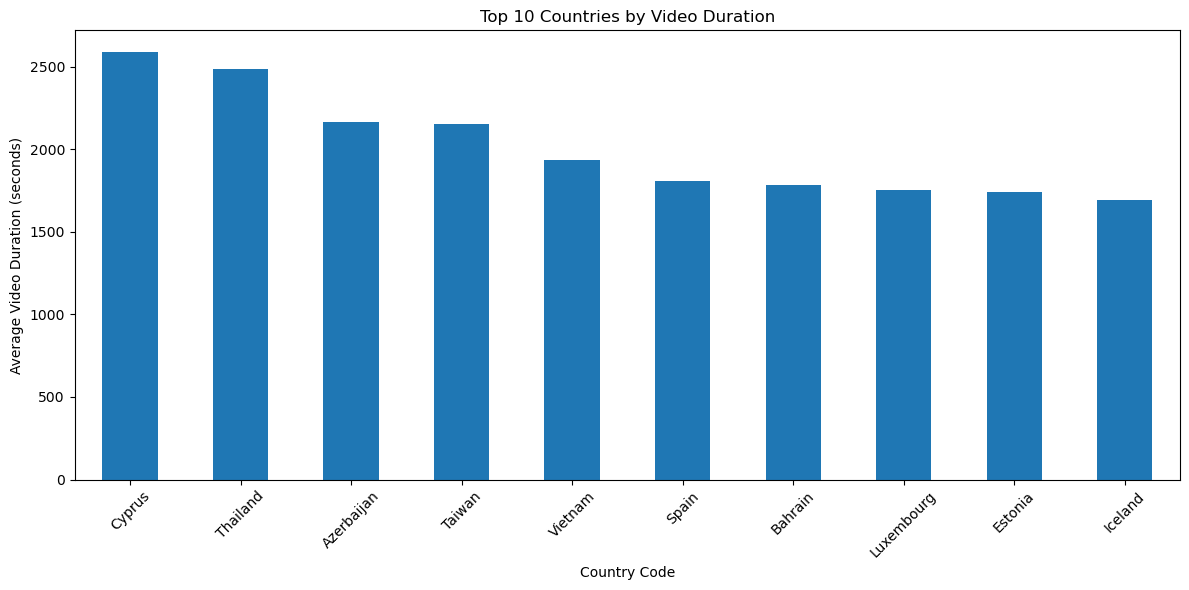

In [19]:
top_countries_engagement = country_analysis_debug.sort_values('engagement_rate', ascending=False).head(10)

top_countries_trend = country_analysis_debug.sort_values('avg_time_to_trend_days', ascending=True).head(10)

plt.figure(figsize=(12, 6))
top_countries_engagement['engagement_rate'].plot(kind='bar')
plt.title('Top 10 Countries by Engagement Rate')
plt.xlabel('Country Code')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
top_countries_trend['avg_time_to_trend_days'].plot(kind='bar')
plt.title('Top 10 Countries by Fastest Time to Trend')
plt.xlabel('Country Code')
plt.ylabel('Average Time to Trend (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
country_analysis_debug['video_duration_seconds'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Video Duration')
plt.xlabel('Country Code')
plt.ylabel('Average Video Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

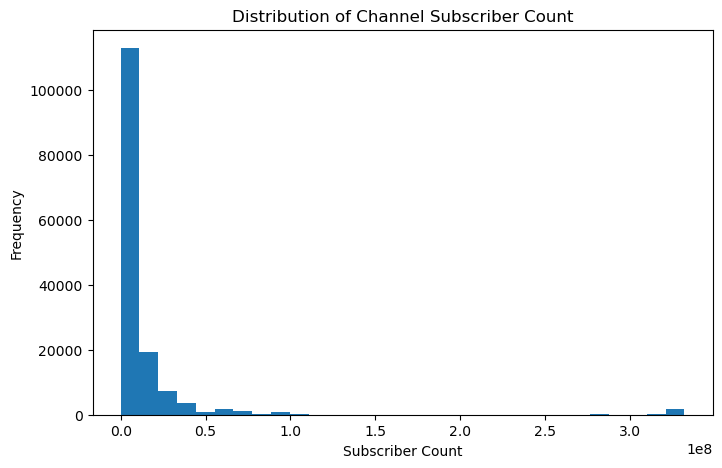

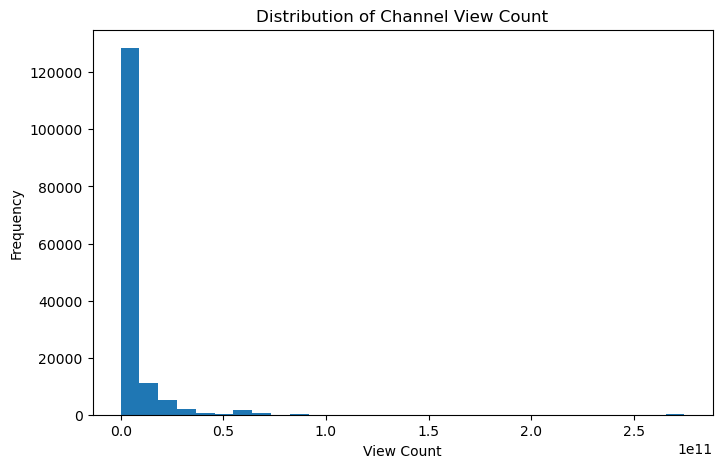

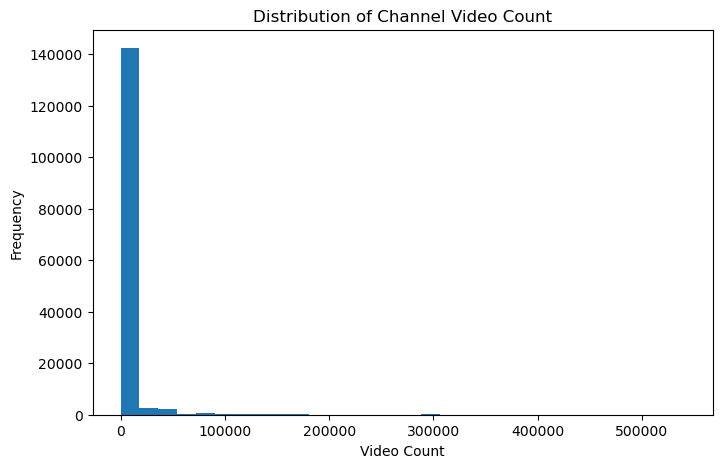

In [20]:
channel_summary = data_cleaned[
    ['channel_subscriber_count', 'channel_view_count', 'channel_video_count']
].describe()

plt.figure(figsize=(8, 5))
plt.hist(data_cleaned['channel_subscriber_count'].dropna(), bins=30)
plt.title('Distribution of Channel Subscriber Count')
plt.xlabel('Subscriber Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(data_cleaned['channel_view_count'].dropna(), bins=30)
plt.title('Distribution of Channel View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(data_cleaned['channel_video_count'].dropna(), bins=30)
plt.title('Distribution of Channel Video Count')
plt.xlabel('Video Count')
plt.ylabel('Frequency')
plt.show()

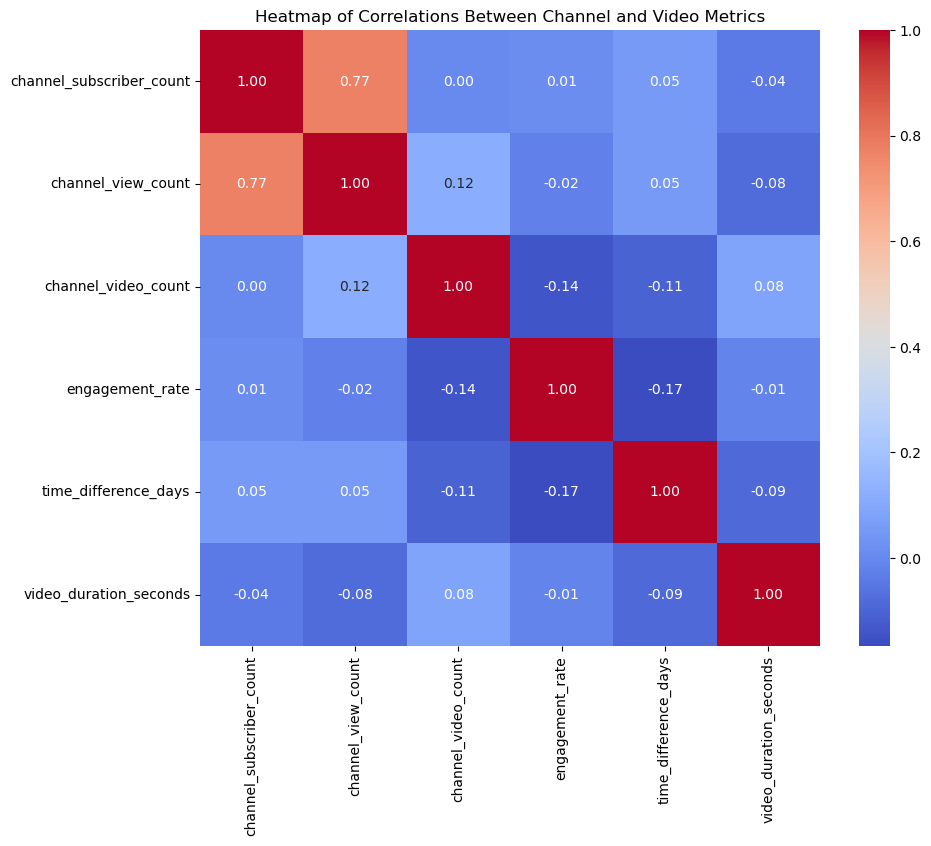

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_cleaned[
    ['channel_subscriber_count', 'channel_view_count', 'channel_video_count',
     'engagement_rate', 'time_difference_days', 'video_duration_seconds']
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlations Between Channel and Video Metrics')
plt.show()


analysis of heatmap

1. subscriber count vs. video metrics
- channel_subscriber_count vs. engagement_rate (0.01): very weak correlation; audience size doesn’t strongly affect video engagement.
    - maybe larger channels attract more passive viewers, diluting engagement.
- channel_subscriber_count vs. time_difference_days (0.05): minimal positive correlation; larger channels trend slightly faster.
    - maybe subscriber base boosts discoverability and early visibility.
2. view count vs. video metrics
- channel_view_count vs. engagement_rate (-0.02): negligible correlation; channel popularity doesn’t guarantee higher engagement on individual videos.
- channel_view_count vs. time_difference_days (0.05): weak positive correlation; more views marginally improve time-to-trend.
3. video count vs. video metrics
- channel_video_count vs. engagement_rate (-0.14): negative correlation; higher video count often results in lower engagement per video.
    - maybe mass uploads may sacrifice quality or focus.
- channel_video_count vs. time_difference_days (-0.11): weak negative correlation; prolific channels face diminishing returns on virality.
4. correlations among channel metrics
- channel_subscriber_count vs. channel_view_count (0.77): strong positive correlation; more subscribers lead to higher cumulative views.
- channel_subscriber_count vs. channel_video_count (0.00): no correlation; audience size isn’t linked to the number of videos produced.

key insights

channel metrics weakly correlate with video metrics, highlighting the importance of video-specific factors over channel-wide statistics.

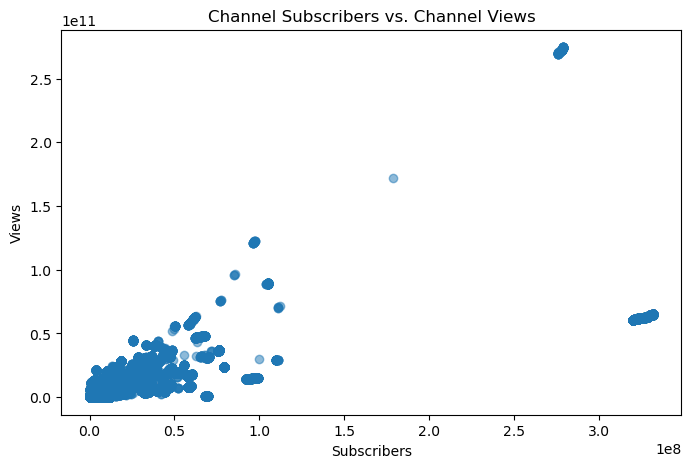

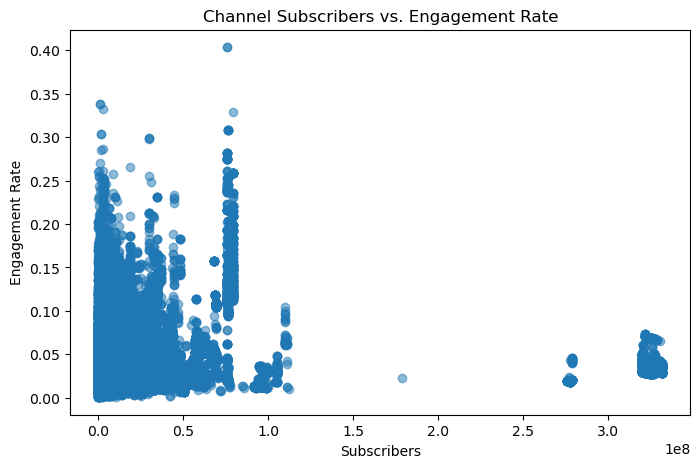

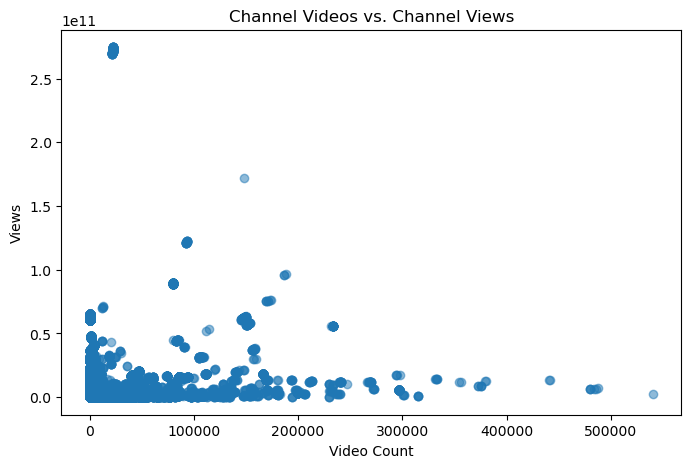

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(data_cleaned['channel_subscriber_count'], data_cleaned['channel_view_count'], alpha=0.5)
plt.title('Channel Subscribers vs. Channel Views')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data_cleaned['channel_subscriber_count'], data_cleaned['engagement_rate'], alpha=0.5)
plt.title('Channel Subscribers vs. Engagement Rate')
plt.xlabel('Subscribers')
plt.ylabel('Engagement Rate')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data_cleaned['channel_video_count'], data_cleaned['channel_view_count'], alpha=0.5)
plt.title('Channel Videos vs. Channel Views')
plt.xlabel('Video Count')
plt.ylabel('Views')
plt.show()

analysis of scatter plots

1. channel subscribers vs. channel viewsobservation:
- noticeable positive trend: more subscribers generally lead to higher channel views.
- some outliers have high views despite moderate subscriber counts.hypothesis:
- strong correlation aligns with the expectation that a larger audience drives cumulative views.
- outliers may be viral channels or ones with evergreen content that attracts non-subscribers.
2. channel subscribers vs. engagement rateobservation:
- smaller channels show a wide range of engagement rates, including the highest values.
- as subscriber count increases, engagement rates cluster at lower levels.hypothesis:
- smaller channels likely have niche, dedicated audiences driving higher engagement.
- larger channels face engagement dilution due to passive viewers.
3. channel videos vs. channel viewsobservation:
- positive trend between the number of videos and total views, but weaker correlation than subscribers vs. views.
- channels with many videos don’t always have proportional views.hypothesis:
- more videos contribute to higher views, but quality matters more than quantity.
- fewer videos with high views suggest viral or high-quality content.

key takeaways

- subscriber count as a key driver: strongly correlated with views, making it vital for growth.
- engagement dilution in larger channels: engagement rates drop with larger audiences, reflecting challenges in maintaining interaction.
- content quality vs. quantity: while more videos help, diminishing returns highlight the importance of high-quality, targeted content.

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

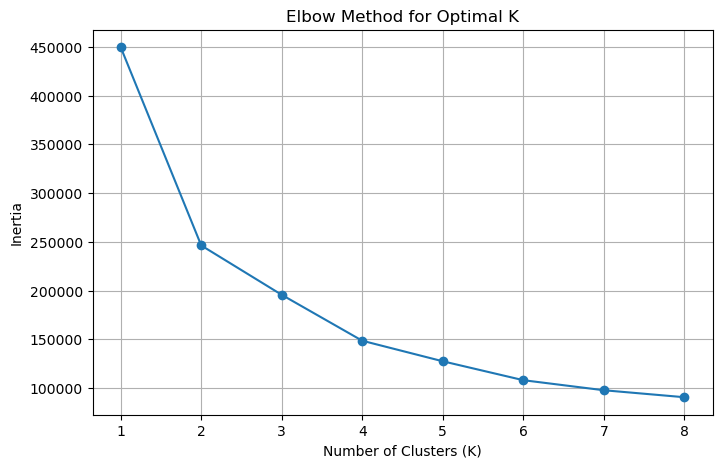

In [24]:
clustering_features = data_cleaned[['channel_subscriber_count', 'channel_view_count', 'channel_video_count']].dropna()
clustering_features_log = np.log1p(clustering_features)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features_log)
clustering_features_log = np.log1p(clustering_features)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features_log)
inertia = []
K = range(1, 9)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [25]:

optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_features_scaled)

data_cleaned['channel_cluster'] = cluster_labels

cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centroids_df = pd.DataFrame(
    np.expm1(cluster_centroids),
    columns=clustering_features.columns
)
cluster_centroids_df['Cluster'] = range(optimal_k)
cluster_centroids_df

,channel_subscriber_count,channel_view_count,channel_video_count,Cluster
0,2.725250e+06,1.463522e+09,15064.558843,0
1,1.998601e+06,5.670539e+08,356.927462,1
2,1.792860e+07,7.725927e+09,951.770874,2
3,1.523977e+05,4.340373e+07,154.142625,3


In [26]:
cluster_centroids_df_fixed = cluster_centroids_df.sort_values('channel_subscriber_count', ascending=True).reset_index(drop=True)
labels = ['Low', 'Medium', 'High', 'Very High']
cluster_centroids_df_fixed['Cluster Category'] = labels
cluster_centroids_df_fixed.drop(columns=['Cluster'])
cluster_centroids_df_fixed

,channel_subscriber_count,channel_view_count,channel_video_count,Cluster,Cluster Category
0,1.523977e+05,4.340373e+07,154.142625,3,Low
1,1.998601e+06,5.670539e+08,356.927462,1,Medium
2,2.725250e+06,1.463522e+09,15064.558843,0,High
3,1.792860e+07,7.725927e+09,951.770874,2,Very High


In [27]:
cluster_label_mapping = { # subscriber count
    3: 'Low',
    1: 'Medium',
    0: 'High',
    2: 'Very High'
}

data_cleaned['channel_cluster'] = data_cleaned['channel_cluster'].map(cluster_label_mapping)

data_cleaned[['channel_cluster', 'channel_subscriber_count', 'channel_view_count', 'channel_video_count']].head()

,channel_cluster,channel_subscriber_count,channel_view_count,channel_video_count
0,Low,321000,46473647,207
1,Low,158000,6395292,61
2,Very High,8880000,2807917957,1612
3,Low,389000,122939495,635
4,Low,436000,85074466,1429


nalysis of cluster-based insights

1. average engagement rate by clusterobservation:
- engagement rate is highest for medium and low clusters.
- engagement rate is lowest for the high cluster.interpretation:
- smaller and medium channels likely have loyal, engaged audiences, boosting engagement rates.
- larger channels experience engagement dilution due to more passive viewers.
2. average time to trend by clusterobservation:
- very high cluster channels take the longest to trend.
- smaller channels in the low cluster trend faster than very high but slower than high.interpretation:
- very large channels rely more on steady audience traction rather than immediate virality.
- high cluster channels trend faster, possibly due to strong audience targeting or viral content.
3. average video duration by clusterobservation:
- high cluster channels produce the longest average videos.
- very high cluster channels create shorter videos compared to others.interpretation:
- longer videos in high cluster reflect in-depth, niche-focused content.
- very large channels optimize for shorter content to maximize reach and retention.

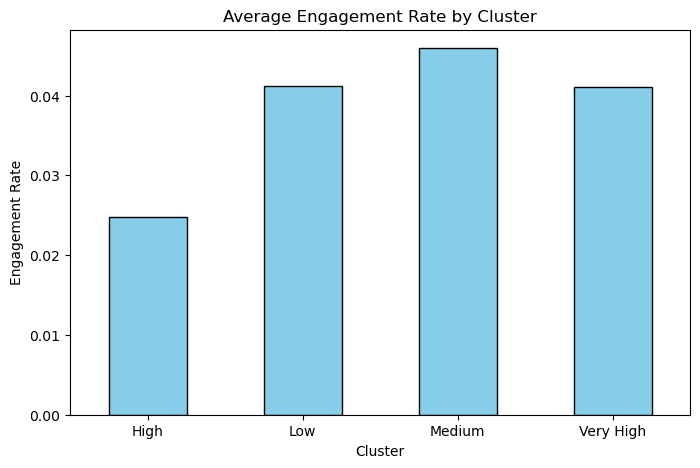

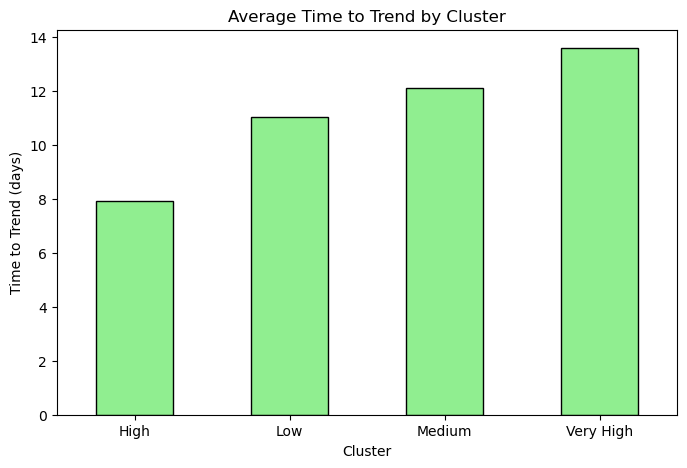

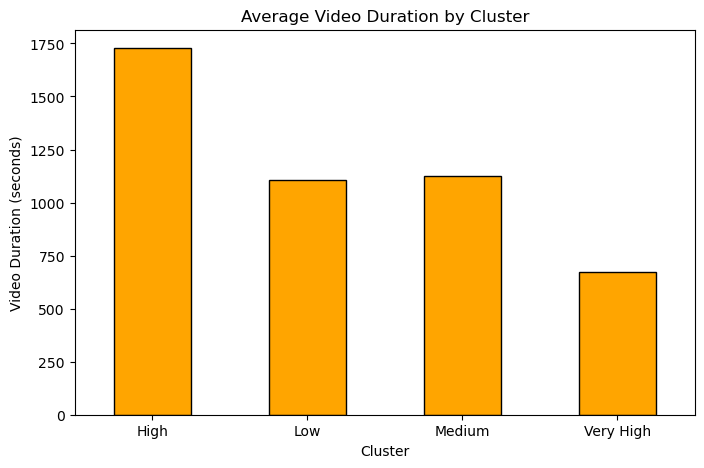

In [28]:
cluster_analysis = data_cleaned.groupby('channel_cluster').agg({
    'engagement_rate': 'mean',
    'time_difference_days': 'mean',
    'video_duration_seconds': 'mean',
    'channel_subscriber_count': 'mean',
    'channel_view_count': 'mean',
    'channel_video_count': 'mean'
}).rename(columns={
    'time_difference_days': 'Avg Time to Trend (days)',
    'video_duration_seconds': 'Avg Video Duration (seconds)',
    'channel_subscriber_count': 'Avg Subscribers',
    'channel_view_count': 'Avg Channel Views',
    'channel_video_count': 'Avg Channel Videos',
    'engagement_rate': 'Avg Engagement Rate'
})

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Engagement Rate'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Engagement Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Time to Trend (days)'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Time to Trend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Time to Trend (days)')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Video Duration (seconds)'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Video Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Video Duration (seconds)')
plt.xticks(rotation=0)
plt.show()
